<table style="width: 100%; margin-left: auto; margin-right: auto; background-color: white;">
<tbody>
<tr>

<td style="text-align: center; width: 12%;"><img src=imagens/brasil-brasao.png alt="" /></td>

<td style="width: 68%;">
<h2 style="text-align: center; margin-top: 1%;">Rep&uacute;blica Federativa do Brasil</h2>
<h2 style="text-align: center; margin-top: 1%;">Minist&eacute;rio da Educa&ccedil;&atilde;o</h2>
<h2 style="text-align: center; margin-top: 1%;">Universidade Federal do Amazonas</h2>
<h2 style="text-align: center; margin-top: 1%;">Instituto de Computa&ccedil;&atilde;o</h2>
</td>

<td style="width: 12%;"><img src="imagens/UFAM-logo.png" alt="" /></td>

</tr>
</tbody>
</table>

# Aprendizado de Máquina e Mineração de Dados
## Lista Prática de Análise de Dados

Professor _Marco Cristo_ 

**Aluno**: Mikael Souza Silva

__Introdução__: Neste trabalho, vamos analisar dados do INEP sobre o ENADE 2017. Estes dados estão organizados em uma releção com as informações do candidato necessárias para realizar a prova, além das suas notas e as respostas que os candidatos deram a questionários sobre a prova, seus dados pessoais e curso realizado. Em anexo, ao fim deste notebook, temos uma descrição detalhada das informações obtidas. 

#### Preliminares

In [1]:
# usar versão do Python 3.x

# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.preprocessing
import sys

In [2]:
print('Python', sys.version)
print('--------')
print('Pandas:', pd.__version__)
print('Numpy:', np.__version__)
print('SKLearn:', sklearn.__version__)

Python 3.7.3 (default, Mar 27 2019, 09:23:15) 
[Clang 10.0.1 (clang-1001.0.46.3)]
--------
Pandas: 0.24.2
Numpy: 1.16.4
SKLearn: 0.21.2


In [3]:
def bp(data, by, title, xlabel, ylabel):
    fig, ax = plt.subplots(figsize=(12, 6))
    data.boxplot(by=by, ax=ax, showmeans=True)
    _ = plt.suptitle('')
    _ = plt.title(title)
    _ = plt.xlabel(xlabel)
    _ = plt.ylabel(ylabel)
    
def density(data, title, xlabel, ylabel, legend):
    fig, ax = plt.subplots(figsize=(8,5))
    plt.hist(data, density=True, bins=10)
    _ = plt.title(title)
    _ = plt.xlabel(xlabel)
    _ = plt.ylabel(ylabel)
    _ = plt.legend(legend)

In [4]:
# Caminho do arquivo
egeral = pd.read_csv('../data/enade2017_Fisica.csv', sep=';') 

In [5]:
egeral.describe()

,CO_IES,CO_CATEGAD,CO_ORGACAD,CO_MODALIDADE,NU_IDADE,ANO_FIM_EM,ANO_IN_GRAD,CO_TURNO_GRADUACAO,NT_GER,NT_FG,...,QE_I59,QE_I60,QE_I61,QE_I62,QE_I63,QE_I64,QE_I65,QE_I66,QE_I67,QE_I68
count,3579.000000,3579.000000,3579.000000,3579.000000,3579.000000,3579.000000,3579.000000,3579.000000,3570.000000,3570.000000,...,3482.000000,3482.000000,3482.000000,3482.000000,3482.000000,3482.000000,3482.000000,3482.000000,3482.000000,3482.000000
mean,1500.868678,1.637329,10027.316848,0.909472,27.482258,2007.729254,2012.741269,3.056720,39.936162,53.520644,...,4.910684,4.700172,4.720563,4.643021,4.711086,4.914130,4.897473,5.022114,4.748420,4.648191
std,3085.326989,1.226826,1.527345,0.286977,7.105561,6.060729,2.121545,1.079496,13.789994,18.059580,...,1.419609,1.563827,1.490476,1.525355,1.462875,1.322178,1.935204,1.544262,1.718615,1.598624
min,1.000000,1.000000,10019.000000,0.000000,18.000000,1965.000000,2000.000000,1.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,338.000000,1.000000,10028.000000,1.000000,23.000000,2006.000000,2012.000000,2.000000,30.500000,41.725000,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
50%,579.000000,1.000000,10028.000000,1.000000,25.000000,2010.000000,2013.000000,3.000000,39.000000,54.600000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
75%,1146.000000,2.000000,10028.000000,1.000000,30.000000,2012.000000,2014.000000,4.000000,48.900000,66.675000,...,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000
max,18506.000000,7.000000,10028.000000,1.000000,69.000000,2016.000000,2017.000000,4.000000,87.000000,97.600000,...,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000


#### Análise de valores faltantes

<div class="alert alert-info">
<b>1</b> - Que colunas possuem campos nulos em **egeral**?
</div>

Há muitas formas de fazer isso em Pandas, como por exemplo através da utilização do método isnull()

### Reposta 1:

In [6]:
# Colunas com dados faltando:
colunas_faltantes = egeral.isnull().any()
print(egeral.columns[colunas_faltantes])

Index(['NT_GER', 'NT_FG', 'NT_OBJ_FG', 'NT_DIS_FG', 'NT_FG_D1', 'NT_FG_D1_PT',
       'NT_FG_D1_CT', 'NT_FG_D2', 'NT_FG_D2_PT', 'NT_FG_D2_CT', 'NT_CE',
       'NT_OBJ_CE', 'NT_DIS_CE', 'NT_CE_D1', 'NT_CE_D2', 'NT_CE_D3', 'QE_I01',
       'QE_I02', 'QE_I03', 'QE_I04', 'QE_I05', 'QE_I06', 'QE_I07', 'QE_I08',
       'QE_I09', 'QE_I10', 'QE_I11', 'QE_I12', 'QE_I13', 'QE_I14', 'QE_I15',
       'QE_I16', 'QE_I17', 'QE_I18', 'QE_I19', 'QE_I20', 'QE_I21', 'QE_I22',
       'QE_I23', 'QE_I24', 'QE_I25', 'QE_I26', 'QE_I27', 'QE_I28', 'QE_I29',
       'QE_I30', 'QE_I31', 'QE_I32', 'QE_I33', 'QE_I34', 'QE_I35', 'QE_I36',
       'QE_I37', 'QE_I38', 'QE_I39', 'QE_I40', 'QE_I41', 'QE_I42', 'QE_I43',
       'QE_I44', 'QE_I45', 'QE_I46', 'QE_I47', 'QE_I48', 'QE_I49', 'QE_I50',
       'QE_I51', 'QE_I52', 'QE_I53', 'QE_I54', 'QE_I55', 'QE_I56', 'QE_I57',
       'QE_I58', 'QE_I59', 'QE_I60', 'QE_I61', 'QE_I62', 'QE_I63', 'QE_I64',
       'QE_I65', 'QE_I66', 'QE_I67', 'QE_I68'],
      dtype='object')


<div class="alert alert-info">
<b>2</b> - Substitua dados faltantes por valores razoáveis. No caso dos questionários, as colunas até QE_I26 podem ser substituídas por um 'Z'. As colunas após a QE_I26 podem ser substituídas por 7 (7 = _Não sei responder_).
</div>

No caso das notas, se elas forem NaN, podemos substituí-las por 0. Após isso, imprima o vetor resultante para confirmar se não há mais valores NaNs

### Resposta 2:

In [7]:
# Filtrando colunas de questionários
colunas = egeral.columns
questionario = list(filter(lambda x: x.startswith('QE_'), colunas))
print("10 primeiras colunas de questionário:",questionario[:10])

10 primeiras colunas de questionário: ['QE_I01', 'QE_I02', 'QE_I03', 'QE_I04', 'QE_I05', 'QE_I06', 'QE_I07', 'QE_I08', 'QE_I09', 'QE_I10']


In [8]:
# Substituição dos valores do questionário
# Questionário 16 tem um valor não catalogado.
# Nos valores NaN, vou adicionar a moda dos valores por estar
# Dentro de um conjunto de questões categóricas.
egeral['QE_I16'] = egeral['QE_I16'].fillna(egeral['QE_I16'].mode())

# Substuindo o resto:
egeral[questionario[:26]] = egeral[questionario[:26]].fillna('Z')
egeral[questionario[26:]] = egeral[questionario[26:]].fillna(7)
egeral[questionario].head()

,QE_I01,QE_I02,QE_I03,QE_I04,QE_I05,QE_I06,QE_I07,QE_I08,QE_I09,QE_I10,...,QE_I59,QE_I60,QE_I61,QE_I62,QE_I63,QE_I64,QE_I65,QE_I66,QE_I67,QE_I68
0,A,D,A,A,D,B,D,B,A,A,...,6.0,6.0,5.0,4.0,4.0,2.0,2.0,6.0,6.0,4.0
1,A,D,A,B,B,B,D,A,A,A,...,5.0,5.0,4.0,3.0,3.0,2.0,2.0,2.0,2.0,3.0
2,A,C,A,D,D,A,C,A,A,A,...,2.0,4.0,1.0,5.0,2.0,4.0,1.0,5.0,6.0,6.0
3,B,D,A,C,A,C,C,C,E,E,...,6.0,6.0,3.0,6.0,6.0,6.0,6.0,6.0,3.0,4.0
4,B,A,A,D,D,C,D,F,F,D,...,4.0,3.0,3.0,4.0,3.0,5.0,4.0,3.0,4.0,3.0


In [9]:
# Verificando quais colunas sobraram com valores faltantes:
filtro_colunas_na = list(egeral.isnull().any())
colunas_com_na = egeral.columns[filtro_colunas_na]
colunas_com_na

Index(['NT_GER', 'NT_FG', 'NT_OBJ_FG', 'NT_DIS_FG', 'NT_FG_D1', 'NT_FG_D1_PT',
       'NT_FG_D1_CT', 'NT_FG_D2', 'NT_FG_D2_PT', 'NT_FG_D2_CT', 'NT_CE',
       'NT_OBJ_CE', 'NT_DIS_CE', 'NT_CE_D1', 'NT_CE_D2', 'NT_CE_D3'],
      dtype='object')

In [10]:
# Aparentemente alguns alunos estão sem as notas da prova
# Isso pode ser devido a um erro dos dados, ou os alunos não estavam presentes na prova.
# Verificarei quantos alunos estão sem a nota da prova.
filtro_alunos_sem_nota = egeral[colunas_com_na].isnull().any(axis=1)
alunos_sem_nota = egeral[filtro_alunos_sem_nota]
print("Quantidade de alunos sem nota: {}".format(len(alunos_sem_nota)))

Quantidade de alunos sem nota: 9


In [11]:
# Uma coisa interessante é que não existe alunos com apenas algumas notas faltando.
# Todos eles não tem nenhuma das notas da prova, o que indica que eles faltaram a prova.
alunos_sem_nota[colunas_com_na].isna().all(axis=1)

3570    True
3571    True
3572    True
3573    True
3574    True
3575    True
3576    True
3577    True
3578    True
dtype: bool

In [12]:
# Devido a isso, temos duas opções: Remover estes alunos da base de dados
# Para estudar o comportamento apenas dos alunos que participaram, ou dar
# A nota 0 para estes alunos que faltaram e contar com eles na análise de todos os alunos.
# Como esses alunos sem nota são um número pequeno comparado com a quantidade total de alunos
# 9 comparado com 3579 então darei a estes alunos a nota 0 pois os mesmo não terão muita
# Influência no resultado das análises posteriores.

egeral[colunas_com_na] = egeral[colunas_com_na].fillna(0)
egeral[colunas_com_na].iloc[alunos_sem_nota.index]

,NT_GER,NT_FG,NT_OBJ_FG,NT_DIS_FG,NT_FG_D1,NT_FG_D1_PT,NT_FG_D1_CT,NT_FG_D2,NT_FG_D2_PT,NT_FG_D2_CT,NT_CE,NT_OBJ_CE,NT_DIS_CE,NT_CE_D1,NT_CE_D2,NT_CE_D3
3570,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3571,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3572,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3573,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3574,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3575,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3576,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3577,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3578,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
# Verificando se tem alguma coluna com valor NaN
# Caso exista, a soma abaixo gera um valor maior que 0
sum(egeral.isnull().any())

0

#### Consultando os dados e comparando distribuições

<div class="alert alert-info">
<b>3</b> - Considerando as distribuições de notas, quem se saiu melhor, os alunos da modalidade presencial ou à distância? _Dica_: boxplots são ótimos para comparar distribuições
</div>

Para várias questões a partir daqui, vamos eventualmente usar um dataframe extra, onde criamos colunas novas, em geral, que servem para fornecer descrição para outra colunas.

In [14]:
data = egeral.copy()
# Escolhendo colunas
colunas = ['NT_GER', 'CO_MODALIDADE']
data = data[colunas]

In [15]:
# Modalidades:
# 0 - Distância
# 1 - Presencial
notas_dist = data[data['CO_MODALIDADE'] == 0]['NT_GER']
notas_pres = data[data['CO_MODALIDADE'] == 1]['NT_GER']

In [16]:
# Transformando dados numéricos para categorias
data['CO_MODALIDADE'] = data['CO_MODALIDADE'].apply(lambda x: 'Distância' if x == 0 else 'Presencial')

In [17]:
# Verificando distribuição dos dados
data.groupby(by='CO_MODALIDADE').describe()

NT_GER                                                     
                count       mean        std  min   25%   50%     75%   max
CO_MODALIDADE                                                             
Distância       324.0  37.679938  14.300124  0.0  27.4  36.3  45.875  82.4
Presencial     3255.0  40.050323  13.862370  0.0  30.7  39.3  49.000  87.0

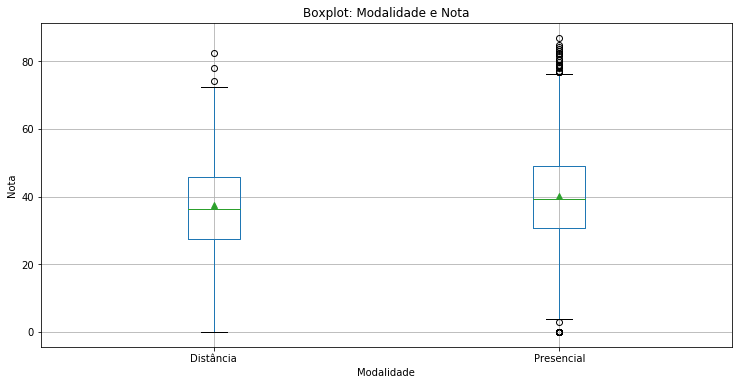

In [18]:
bp(data, 'CO_MODALIDADE', 'Boxplot: Modalidade e Nota', 'Modalidade', 'Nota')

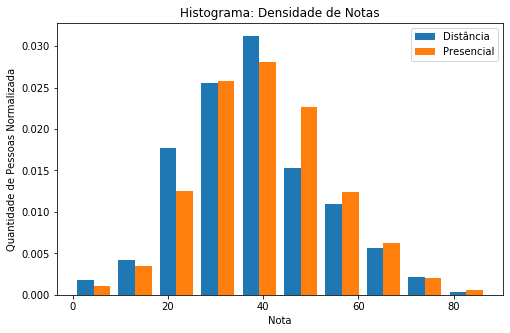

In [19]:
# Plotando histograma de densidade
density(data=[notas_dist, notas_pres],
        title='Histograma: Densidade de Notas',
        xlabel='Nota',
        ylabel='Quantidade de Pessoas Normalizada',
        legend=['Distância', 'Presencial'])

Explique os resultados obtidos.

### Resposta 3:

Com o gráfico de caixa, podemos ver que a média dos alunos da modalidade presencial é maior que a média dos alunos a distância. É notável também que embora as notas dos alunos da modalidade presencial sejam mais distantes da média, temos uma maior concentração de notas acima do limite que considera outliers.

Olhando para o histograma de densidade, podemos confirmar que os alunos da modalidade presencial tendem a tirar notas maiores que os alunos da modalidade a distância, pois há uma maior porcentagem de alunos da modalidade presencial com nota acima de 40 comparados com os alunos da modalidade a distância.

<div class="alert alert-info">
<b>4</b> - Novamente considere as distribuições de notas. Como se comparam os alunos do turno noturno com os dos demais turnos? Há mais alunos estudando ao dia ou à noite? 
</div> 

In [20]:
# Novo dataframe
data = egeral.copy()
colunas = ['NT_GER', 'CO_TURNO_GRADUACAO']
data = data[colunas]
data.head()

,NT_GER,CO_TURNO_GRADUACAO
0,12.1,1.0
1,25.1,1.0
2,47.3,1.0
3,24.4,4.0
4,64.9,4.0


In [21]:
# Quantidade de alunos no total
print("Quantida de alunos: ", len(data))

Quantida de alunos:  3579


In [22]:
# Transformando dados numéricos para categorias
categorias = ['Matutino', 'Vespertino', 'Integral', 'Noturno']
data['CO_TURNO_GRADUACAO'] = data['CO_TURNO_GRADUACAO'].apply(lambda x: categorias[int(x) - 1])

In [23]:
# Dados sobre turnos
data.groupby(by='CO_TURNO_GRADUACAO').describe()

NT_GER                                                   \
                     count       mean        std  min     25%   50%     75%   
CO_TURNO_GRADUACAO                                                            
Integral             928.0  40.665948  14.035016  0.0  31.375  40.0  50.125   
Matutino             510.0  39.046863  14.167813  0.0  29.800  37.5  47.450   
Noturno             1682.0  40.222354  13.886250  0.0  30.900  39.4  49.000   
Vespertino           459.0  37.616993  13.268244  0.0  28.450  36.1  46.800   

                          
                     max  
CO_TURNO_GRADUACAO        
Integral            79.7  
Matutino            87.0  
Noturno             82.9  
Vespertino          84.7

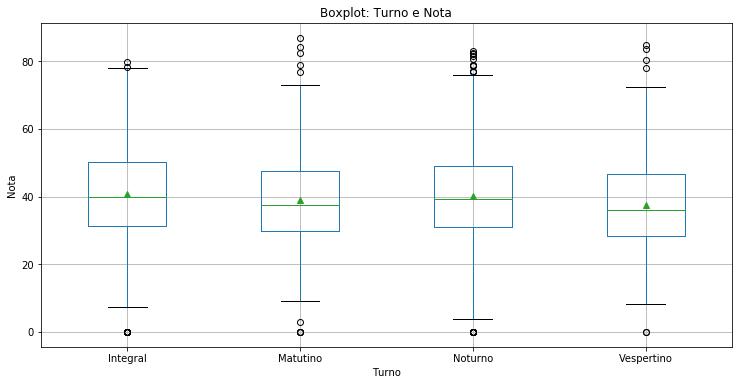

In [24]:
# Plotando gráfico
bp(data, 'CO_TURNO_GRADUACAO', 'Boxplot: Turno e Nota', 'Turno', 'Nota')

Explique os resultados obtidos.

### Resposta 4:

**4.1:** O turno noturno, em relação a média, tem notas maiores que os turnos matutino e vespertino, mas se sai pior que o turno integral.

O turno noturno, quando comparado ao turno integral, tem um número maior de outliers. Isso pode indicar que existe uma maior variabilidade entre as notas dos alunos do turno noturno, enquanto os alunos de tempo integral tendem a tirar notas mais próximas da média.

**4.2:** Existem 3579 na base de dados, sendo 1682 do período noturno e 1897 dos turnos restantes combinados, portanto, se considerarmos o período integral como manhã e tarde, há um número maior de alunos estudando ao dia que à noite.

<div class="alert alert-info">
<b>5</b> - Em geral, o MEC acredita que **não** há importantes diferenças de desepenho entre alunos quotistas e não quotistas. Isto é o que você observa, considerando as distribuições de notas dos dois grupos? _Dica_: não são quotistas os alunos que responderam A à pergunta QE_I15.
</div>

In [25]:
colunas = ['NT_GER', 'QE_I15']
data = egeral[colunas]
data.head()

,NT_GER,QE_I15
0,12.1,D
1,25.1,C
2,47.3,A
3,24.4,B
4,64.9,A


In [26]:
# Removendo dados com Z por não ter resposta
data = data.drop(data[data['QE_I15'] == 'Z'].index)

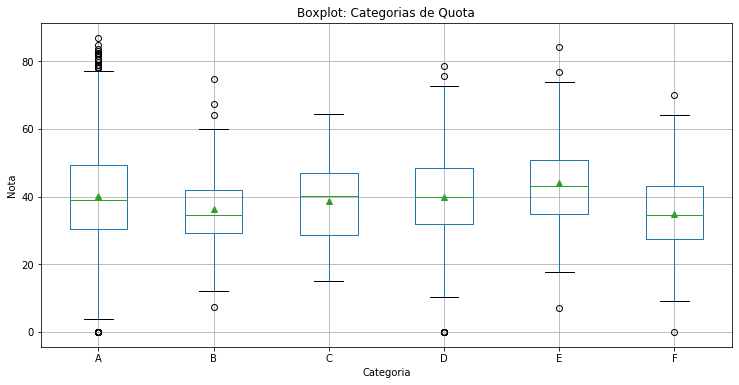

In [27]:
# Plotando gráfico
bp(data, 'QE_I15', 'Boxplot: Categorias de Quota', 'Categoria', 'Nota')

In [28]:
# Juntando alunos cotistas em uma categoria:
data['QE_I15'] = data['QE_I15'].apply(lambda x: 'Q' if x != 'A' else 'A')

notas_nq = data[data['QE_I15'] == 'A']['NT_GER']
notas_q = data[data['QE_I15'] == 'Q']['NT_GER']

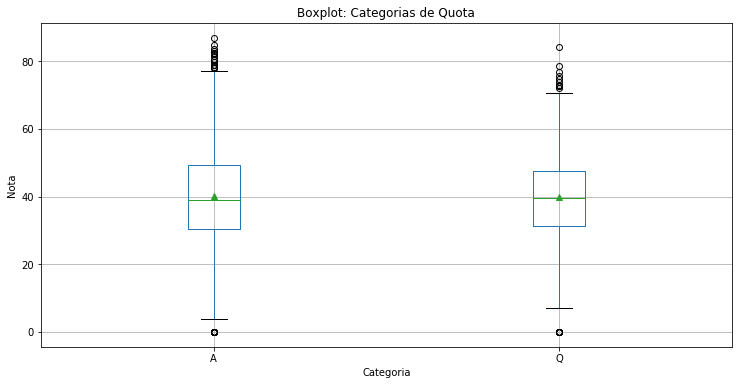

In [29]:
# Plotando Gráfico
bp(data, 'QE_I15', 'Boxplot: Categorias de Quota', 'Categoria', 'Nota')

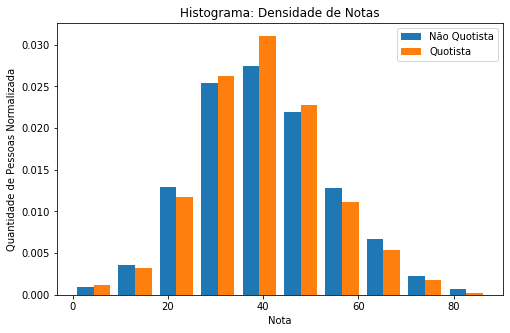

In [30]:
# Plotando histograma de densidade
density(data=[notas_nq, notas_q],
        title='Histograma: Densidade de Notas',
        xlabel='Nota',
        ylabel='Quantidade de Pessoas Normalizada',
        legend=["Não Quotista", "Quotista"])

Explique os resultados obtidos.

### Resposta 5:

Através do boxplot entre as diversas categorias de alunos quotistas, podemos ver uma pequena variação entre as notas dos alunos não quotistas e quotistas, porém, ao agrupar os alunos quotistas em apenas 1 categoria, vemos que as notas são bem similares.

O gráfico de densidade mostra também que os alunos quotistas tem notas que são mais centralizadas, equanto as notas dos alunos não quotistas estão mais dispersas entre notas ruins e boas.

Portanto, para o curso de física, alunos quotistas não parecem ter nenhuma diferença significativa de desempenho comparado aos alunos não quotistas.

<div class="alert alert-info">
<b>6</b> - Como se comparam os desempenhos dos alunos de instituíções públicas, privadas sem fim lucrativo e privadas com fim lucrativo?
</div>

In [31]:
data = egeral.copy()
colunas = ['NT_GER', 'CO_CATEGAD']
data = data[colunas]
data.head()

,NT_GER,CO_CATEGAD
0,12.1,1
1,25.1,1
2,47.3,1
3,24.4,1
4,64.9,1


In [32]:
# Removendo dados com 7 por não ter resposta
data = data.drop(data[data['CO_CATEGAD'] == 7].index)

In [33]:
sorted(data['CO_CATEGAD'].unique())

[1, 2, 3, 4, 5]

In [34]:
categorias = ['Pública Federal', 'Pública Estadual', 'Pública Municipal',
              'Privada com FL', 'Privada sem FL', 'Especial']
data['CO_CATEGAD'] = data['CO_CATEGAD'].apply(lambda x: categorias[x - 1])

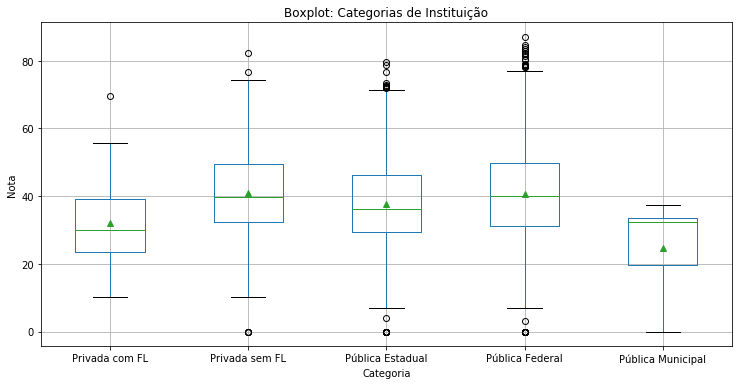

In [35]:
# Plotando gráfico
bp(data, 'CO_CATEGAD', 'Boxplot: Categorias de Instituição', 'Categoria', 'Nota')

In [36]:
for index, categoria in enumerate(categorias):
    print("Instituição: {}, Qnt Alunos: {}".format(categoria, len(data[data['CO_CATEGAD'] == categorias[index]]['NT_GER'])))

Instituição: Pública Federal, Qnt Alunos: 2461
Instituição: Pública Estadual, Qnt Alunos: 708
Instituição: Pública Municipal, Qnt Alunos: 5
Instituição: Privada com FL, Qnt Alunos: 67
Instituição: Privada sem FL, Qnt Alunos: 333
Instituição: Especial, Qnt Alunos: 0


In [37]:
# Agrupando alunos de instituições públicas:
categorias_publicas = ['Pública Federal', 'Pública Estadual', 'Pública Municipal']
data['INSTITUICAO'] = data['CO_CATEGAD'].apply(lambda x: 'Pública' if x in categorias_publicas else x)

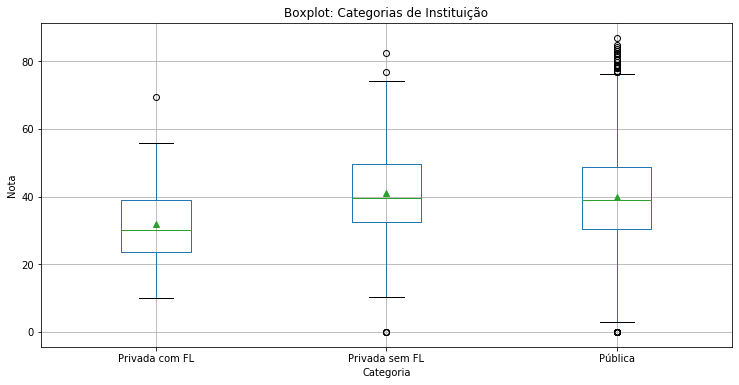

In [38]:
bp(data, 'INSTITUICAO', 'Boxplot: Categorias de Instituição', 'Categoria', 'Nota')

Comente sobre os resultados obtidos.

### Resposta 6:

Por conta da baixa quantidade de alunos das instituições públicas municipais, preferi agrupar os alunos das universidades públicas em um só grupo.

A partir dos gráficos anteriores, instituições privadas sem fins lucrativos parecem ter o melhor entre os 3 tipos de instituições, com universidades públicas e privadas com fins lucrativos em segundo e terceiro respectivamente.

#### Cruzando dados

Os motivos elencados para descrever o que leva um candidato a escolher seu curso incluem:

A = Inserção no mercado de trabalho.<br>B = Influência familiar.<br>C = Valorização profissional.<br>D = Prestígio Social.<br>E = Vocação.<br>F = Oferecimento do curso na modalidade a distância.<br>G = Baixa concorrência para ingresso.<br>H = Outro motivo. 

<div class="alert alert-info">
<b>7</b> - Cruze a informação sobre o turno do curso do aluno com a resposta dada a esta pergunta (QE_I25), de forma a obter, para os motivos dados, o percentual de alunos que os escolheram, de acordo com os cursos realizados.
</div>

In [39]:
data = egeral.copy()
colunas = ['CO_TURNO_GRADUACAO', 'QE_I25']
data = data[colunas]

# Convertendo turno de números para categorias:
categorias = ['Matutino', 'Vespertino', 'Integral', 'Noturno']
data['CO_TURNO_GRADUACAO'] = data['CO_TURNO_GRADUACAO'].apply(lambda x: categorias[int(x) - 1])

# Removendo valores com Z
data = data[data['QE_I25'] != 'Z']

data.head()

,CO_TURNO_GRADUACAO,QE_I25
0,Matutino,H
1,Matutino,H
2,Matutino,G
3,Noturno,H
4,Noturno,E


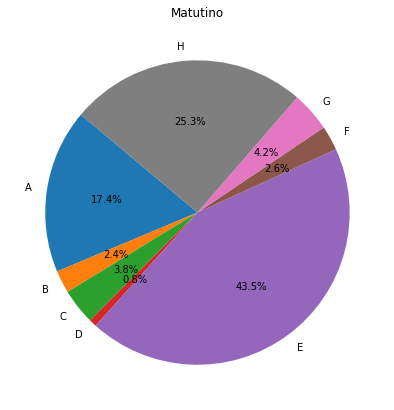

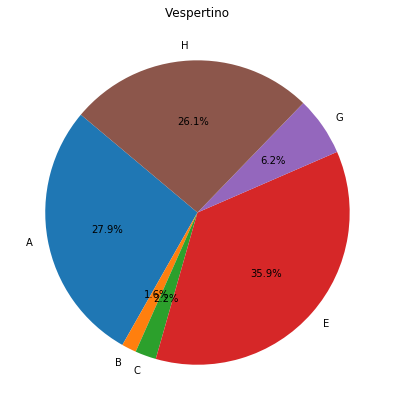

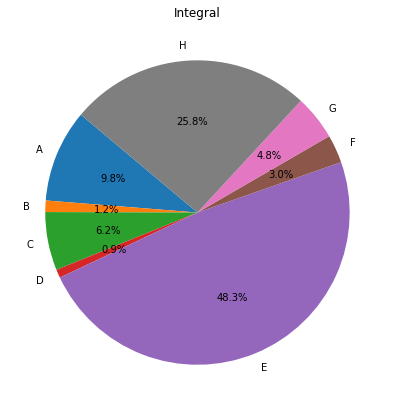

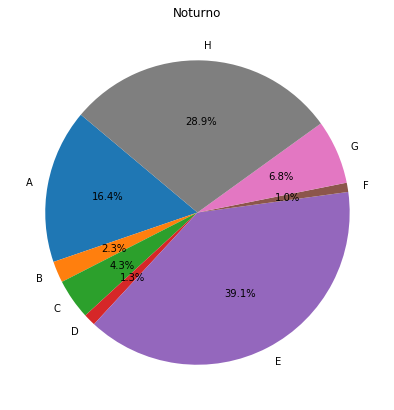

In [40]:
gv = lambda x:data[data['CO_TURNO_GRADUACAO'] == x]['QE_I25'].value_counts()
for categoria in categorias:
    v = gv(categoria)
    v = v.sort_index()
    fig, ax = plt.subplots(1, 1, figsize=(7,7))
    plt.title(categoria)
    plt.pie(v.values, labels=v.index, autopct='%1.1f%%', startangle=140)
plt.show()

Comente sobre os resultados obtidos.

### Resposta 7:
Segundo os gráficos anteriores, vemos que não há uma grande variação da motivação dos alunos entre os diversos turnos.

Em primeiro lugar temos como motivo a vocação do aluno pelo curso de física. Para os alunos do turno vespertino, a inserção no mercado de trabalho é o segundo maior motivo enquanto para os outros turnos a opção "Outro motivo" foi a segunda mais marcada.

Em terceiro e quarto lugar temos ou inserção no mercado de trabalho ou "Outros motivos". Por fim, temos que alunos do período integral tem motivos de valorização profissional enquanto os alunos dos outros turnos escolheram o curso pela baxa concorrência de ingresso.

Considerando as seguintes faixas de renda (QE_I08):

A = Até 1,5 salário mínimo (até R\$ 1.086,00).

B = De 1,5 a 3 salários mínimos (R\$ 1.086,01 a R\$ 2.172,00).<br>
C = De 3 a 4,5 salários mínimos (R\$ 2.172,01 a R\$ 3.258,00).<br>D = De 4,5 a 6 salários mínimos (R\$ 3.258,01 a R\$ 4.344,00).<br>E = De 6 a 10 salários mínimos (R\$ 4.344,01 a R\$ 7.240,00).<br>F = De 10 a 30 salários mínimos (R\$ 7.240,01 a R\$ 21.720,00).<br>G = Acima de 30 salários mínimos (mais de R\$ 21.720,01).

<div class="alert alert-info">
<b>8</b> - É verdade que, quando comparado às instituíções privadas, estão nos cursos das universidades federais tanto os estudantes mais pobres quanto os mais ricos do país?
</div>

In [41]:
data = egeral.copy()
colunas = ['QE_I08', 'CO_CATEGAD']
data = data[colunas]

# Removendo dados com 7 por não ter resposta
data = data.drop(data[data['CO_CATEGAD'] == 7].index)
data = data.drop(data[data['QE_I08'] == 'Z'].index)

categorias = ['Pública Federal', 'Pública Estadual', 'Pública Municipal',
              'Privada com FL', 'Privada sem FL', 'Especial']
data['CO_CATEGAD'] = data['CO_CATEGAD'].apply(lambda x: categorias[x - 1])

# Agrupando alunos de instituições públicas:
categorias_publicas = ['Pública Federal', 'Pública Estadual', 'Pública Municipal']
data['INSTITUICAO'] = data['CO_CATEGAD'].apply(lambda x: 'Pública' if x in categorias_publicas else 'Privada')

In [42]:
data.head()

,QE_I08,CO_CATEGAD,INSTITUICAO
0,B,Pública Federal,Pública
1,A,Pública Federal,Pública
2,A,Pública Federal,Pública
3,C,Pública Federal,Pública
4,F,Pública Federal,Pública


In [43]:
print(data[data['INSTITUICAO'] == 'Pública']['QE_I08'].value_counts(normalize=True).sort_index())
print(data[data['INSTITUICAO'] == 'Privada']['QE_I08'].value_counts(normalize=True).sort_index())

A    0.271813
B    0.292248
C    0.192994
D    0.093740
E    0.085955
F    0.059358
G    0.003892
Name: QE_I08, dtype: float64
A    0.131980
B    0.284264
C    0.228426
D    0.131980
E    0.142132
F    0.071066
G    0.010152
Name: QE_I08, dtype: float64


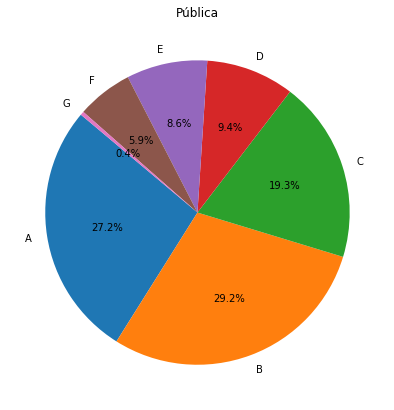

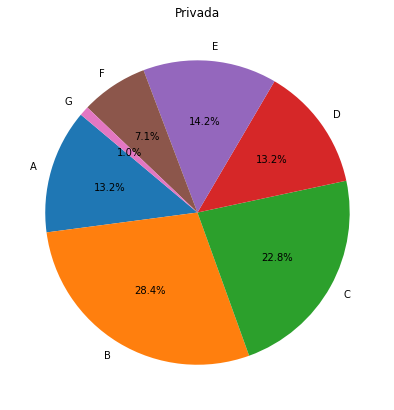

In [44]:
gv = lambda x:data[data['INSTITUICAO'] == x]['QE_I08'].value_counts()
for categoria in ['Pública', 'Privada']:
    v = gv(categoria)
    v = v.sort_index()
    fig, ax = plt.subplots(1, 1, figsize=(7,7))
    plt.title(categoria)
    plt.pie(v.values, labels=v.index, autopct='%1.1f%%', startangle=140)
plt.show()

Comente sobre os resultados.

### Resposta 8:
Podemos observar nos gráficos que as instituições de ensino públicas tem maior quantidade de alunos de baixa renda (A e B) comparado as instituições de ensino privado e o contrário acontece nas instituições de ensino privadas (maior quantidade de alunos de alta renda).

#### Obtendo valor consolidado sobre dados cruzados (pivô)

Considerando como foi o ensino médio dos alunos, de acordo com as opções em QE_I17:

A = Todo em escola pública.<br>B = Todo em escola privada (particular).<br>C = Todo no exterior.<br>D = A maior parte em escola pública.<br>E = A maior parte em escola privada (particular).<br>F = Parte no Brasil e parte no exterior.

<div class="alert alert-info">
<b>9</b> - Qual a nota geral média dos alunos, de acordo com a forma como ele cursou ensino médio?
</div>

In [45]:
# Preparação dos dados
data = egeral.copy()
colunas = ['NT_GER', 'QE_I17']
data = data[colunas]

data = data[data['QE_I17'] != 'Z']

data.head()

,NT_GER,QE_I17
0,12.1,A
1,25.1,A
2,47.3,B
3,24.4,A
4,64.9,A


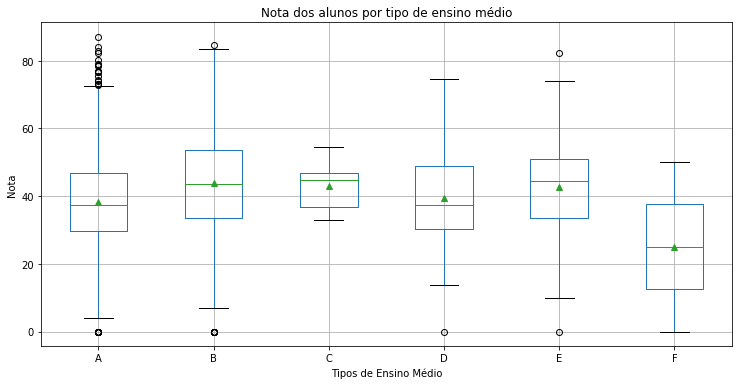

In [46]:
# Plotando Gráfico
bp(data, 'QE_I17', 'Nota dos alunos por tipo de ensino médio', 'Tipos de Ensino Médio', 'Nota')

In [47]:
# Calculando a média de cada tipo de aluno
print("Média de nota dos alunos: ", data.groupby('QE_I17').mean())
print("Quantidade de alunos por categoria:", data.groupby('QE_I17').count())

Média de nota dos alunos:             NT_GER
QE_I17           
A       38.370152
B       43.879612
C       43.033333
D       39.494030
E       42.652778
F       25.100000
Quantidade de alunos por categoria:         NT_GER
QE_I17        
A         2305
B          927
C            6
D          134
E          108
F            2


### Resposta 9:
A partir da média vemos que estudaram em escola particular se saíram melhor que os outros grupos enquanto alunos que estudaram parte no brasil e parte no exterior obtiveram os piores resultados, entretando por existirem apenas 2 alunos na base de dados da categoria de alunos que estudaram parte no brasil e parte no exterior, é difícil generalizar esta afirmação.

O que podemos afirmar com um pouco mais de certeza é que os alunos que estudaram apenas em escola pública tiveram média pior que os outros grupos (com exceção do F) e que alunso que estudaram a maior parte em escola pública se saíram um pouco melhor.

<div class="alert alert-info">
<b>10</b> - Qual a nota geral média dos alunos, de acordo com sua renda, por regiao? Caso sua base se refira a uma única região, considere a renda por estado daquela região.
</div>

In [48]:
data = egeral.copy()
colunas = ['NT_GER', 'REGIAO', 'QE_I08']
data = data[colunas]

data = data[data['QE_I08'] != 'Z']

data.head()

,NT_GER,REGIAO,QE_I08
0,12.1,CO,B
1,25.1,CO,A
2,47.3,CO,A
3,24.4,CO,C
4,64.9,CO,F


In [49]:
print("Média de notas dos alunos por renda por região:")
data.groupby(['REGIAO', 'QE_I08']).mean()

Média de notas dos alunos por renda por região:


NT_GER
REGIAO QE_I08           
CO     A       35.123913
       B       38.053012
       C       39.165306
       D       37.687500
       E       43.272222
       F       50.790323
       G       50.700000
NE     A       35.740238
       B       36.383673
       C       38.817610
       D       40.708621
       E       48.960000
       F       47.239130
       G       48.700000
NO     A       31.895977
       B       34.461538
       C       35.407813
       D       35.328000
       E       41.015000
       F       35.537500
SE     A       39.433143
       B       41.085933
       C       42.950181
       D       43.894194
       E       46.610067
       F       43.470968
       G       47.200000
SU     A       43.615190
       B       41.482517
       C       43.638686
       D       42.735443
       E       44.926316
       F       49.044643
       G       50.300000

Explique os resultados.

### Resposta 10:
A tabela mostra que há uma tendência da nota do aluno ser melhor caso este aluno pertença a uma família com uma faixa de renda alta. Quase todos as regiões seguem esse padrão com exceção da região norte.

Além disso podemos ver que as regiões mais ao Sul do país tem desempenho melhor quando comparadas as regiões ao norte.

#### Agrupando e ordenando dados

<div class="alert alert-info">
<b>11</b> - Qual o ranking dos estados de acordo com a nota média obtida por alunos, considerando apenas instituições públicas?
</div>

In [50]:
data = egeral.copy()
colunas = ['NT_GER', 'CO_CATEGAD', 'REGIAO']
data = data[colunas]

# Removendo dados com 7 por não ter resposta
data = data.drop(data[data['CO_CATEGAD'] == 7].index)

categorias = ['Pública Federal', 'Pública Estadual', 'Pública Municipal',
              'Privada com FL', 'Privada sem FL', 'Especial']
data['CO_CATEGAD'] = data['CO_CATEGAD'].apply(lambda x: categorias[x - 1])

# Agrupando alunos de instituições públicas:
categorias_publicas = ['Pública Federal', 'Pública Estadual', 'Pública Municipal']
data['INSTITUICAO'] = data['CO_CATEGAD'].apply(lambda x: 'Pública' if x in categorias_publicas else 'Privada')

# Removendo dados de instituições privadas
data = data[data['INSTITUICAO'] == 'Pública']

# Removendo colunas não necessárias:
data = data.drop(['CO_CATEGAD', 'INSTITUICAO'], axis=1)
data.head()

,NT_GER,REGIAO
0,12.1,CO
1,25.1,CO
2,47.3,CO
3,24.4,CO
4,64.9,CO


In [51]:
data.groupby('REGIAO').mean().sort_values(by='NT_GER', ascending=False)

,NT_GER
REGIAO,
SU,44.546094
SE,43.125953
CO,39.677016
NE,37.311331
NO,33.816912


Explique os resultados obtidos.

### Resposta 11:

As regiões são classificadas nas seguintes posições:

1. Sul
2. Sudeste
3. Centro-Oeste
4. Nordeste
5. Norte

#### Comportamentos anômalos

<div class="alert alert-info">
<b>12</b> - Como se comparam as variáveis **idade**, **nota geral**, **ano de início da graduação** e **ano de fim do ensino médio** em termos de anomalias?
</div>

In [52]:
data = egeral.copy()
colunas = ['NU_IDADE', 'NT_GER', 'ANO_FIM_EM', 'ANO_IN_GRAD']
data = data[colunas]

data.head()

,NU_IDADE,NT_GER,ANO_FIM_EM,ANO_IN_GRAD
0,23,12.1,2011.0,2012.0
1,25,25.1,2009.0,2012.0
2,24,47.3,2010.0,2013.0
3,38,24.4,1996.0,2017.0
4,53,64.9,1982.0,2015.0


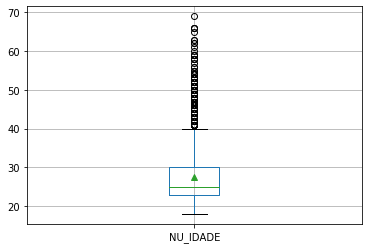

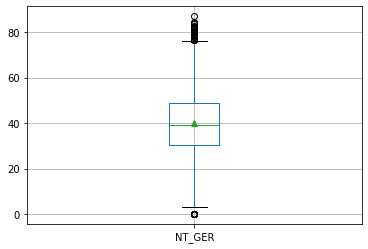

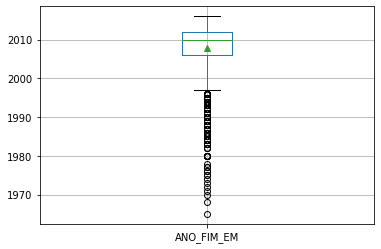

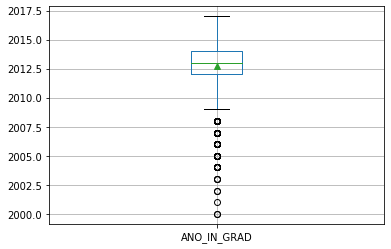

In [53]:
for column in data.columns:
    data[[column]].boxplot(showmeans=True)
    plt.show()

/Users/mikael/.pyenv/ammd/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3296: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x117109cc0>,
      dtype=object)

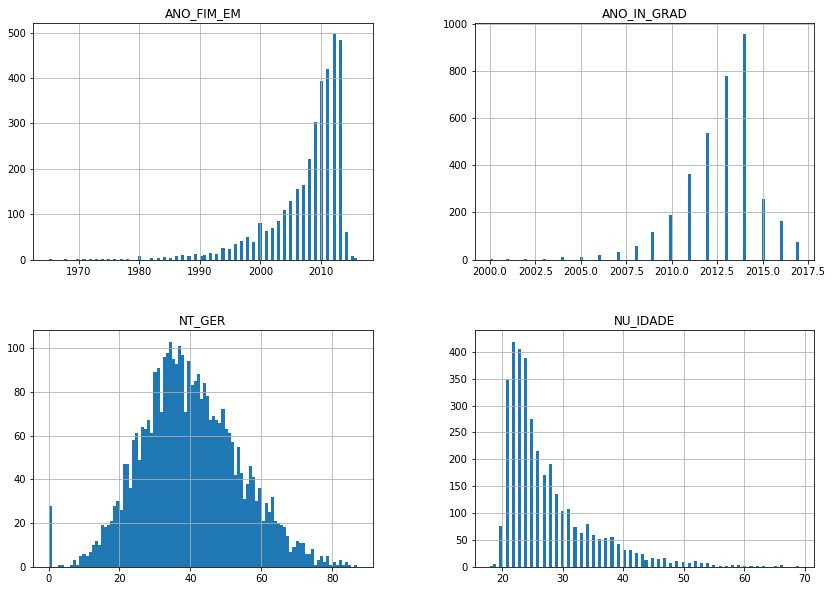

In [54]:
img, ax = plt.subplots(figsize=(14,10))
data.hist(ax=ax, bins=100)

Dica: Utilize BOXPLOT ou histograma para facilitar o entendimento.

Comente sobre os resultados.

### Resposta 12:



#### Engenharia de atributos

As questões QE_I27 a QE_I68 nos permitem avaliar quão boa é a instituição de acordo com a visão dos estudantes. Ela deve ser calculada como:

NT_INST = $\frac{1}{N} \sum_{i=27}^{68} \frac{f(\text{QE_I}_i) - 1}{5}$

onde $f$ é uma função que retorna o valor de QE_I$_i$ se ele estiver entre 1 a 6; ela retorna 1, caso contrário. $N$ é o total de questões, entre QE_I27 a QE_I68, que tiveram nota entre 1 a 6.

<div class="alert alert-info">
<b>13</b> - Seguindo a definição dada, crie a coluna NT_INST que reflete a nota que cada estudante daria para a instituição. 
</div>    

In [55]:
data = egeral.copy()
colunas = [x for x in egeral.columns if x.startswith('QE_')]
colunas = colunas[26:68]
data = data[colunas]
data.columns

Index(['QE_I27', 'QE_I28', 'QE_I29', 'QE_I30', 'QE_I31', 'QE_I32', 'QE_I33',
       'QE_I34', 'QE_I35', 'QE_I36', 'QE_I37', 'QE_I38', 'QE_I39', 'QE_I40',
       'QE_I41', 'QE_I42', 'QE_I43', 'QE_I44', 'QE_I45', 'QE_I46', 'QE_I47',
       'QE_I48', 'QE_I49', 'QE_I50', 'QE_I51', 'QE_I52', 'QE_I53', 'QE_I54',
       'QE_I55', 'QE_I56', 'QE_I57', 'QE_I58', 'QE_I59', 'QE_I60', 'QE_I61',
       'QE_I62', 'QE_I63', 'QE_I64', 'QE_I65', 'QE_I66', 'QE_I67', 'QE_I68'],
      dtype='object')

In [56]:
f = lambda x: 1 if x > 6 else x

values = list()
for row in data.values:
    s = 0
    for value in row:
        s += f(value) - 1
    s = s / (5 * len(row))
    values.append(s)
values = np.array(values)
values

data['NT_INST'] = values
nt_inst = values

In [57]:
data.head(10)

,QE_I27,QE_I28,QE_I29,QE_I30,QE_I31,QE_I32,QE_I33,QE_I34,QE_I35,QE_I36,...,QE_I60,QE_I61,QE_I62,QE_I63,QE_I64,QE_I65,QE_I66,QE_I67,QE_I68,NT_INST
0,5.0,5.0,5.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,...,6.0,5.0,4.0,4.0,2.0,2.0,6.0,6.0,4.0,0.828571
1,4.0,3.0,5.0,2.0,4.0,5.0,6.0,3.0,6.0,5.0,...,5.0,4.0,3.0,3.0,2.0,2.0,2.0,2.0,3.0,0.523810
2,5.0,5.0,3.0,6.0,6.0,6.0,5.0,6.0,1.0,5.0,...,4.0,1.0,5.0,2.0,4.0,1.0,5.0,6.0,6.0,0.638095
3,6.0,6.0,6.0,8.0,8.0,6.0,8.0,8.0,8.0,8.0,...,6.0,3.0,6.0,6.0,6.0,6.0,6.0,3.0,4.0,0.700000
4,3.0,4.0,2.0,2.0,2.0,3.0,2.0,2.0,2.0,2.0,...,3.0,3.0,4.0,3.0,5.0,4.0,3.0,4.0,3.0,0.347619
5,8.0,5.0,3.0,1.0,2.0,8.0,6.0,8.0,3.0,6.0,...,2.0,4.0,4.0,3.0,5.0,1.0,8.0,1.0,4.0,0.504762
6,7.0,6.0,7.0,7.0,6.0,6.0,6.0,6.0,6.0,6.0,...,6.0,1.0,4.0,4.0,3.0,1.0,6.0,6.0,6.0,0.728571
7,6.0,5.0,1.0,4.0,6.0,5.0,6.0,5.0,3.0,5.0,...,5.0,5.0,5.0,2.0,6.0,5.0,5.0,4.0,6.0,0.638095
8,5.0,5.0,5.0,5.0,5.0,6.0,6.0,5.0,6.0,5.0,...,4.0,2.0,3.0,3.0,5.0,3.0,3.0,3.0,1.0,0.638095
9,4.0,5.0,6.0,5.0,6.0,5.0,6.0,6.0,6.0,6.0,...,5.0,5.0,4.0,5.0,5.0,7.0,5.0,6.0,6.0,0.676190


#### Preparando dados para classificação

Queremos tentar prever a nota de um aluno apartir das seguintes informações:

* CO_CATEGAD, CO_ORGACAD, CO_MODALIDADE, CO_UF_CURSO, REGIAO,  
* NU_IDADE, TP_SEXO, CO_TURNO_GRADUACAO, 
* QE_I01, QE_I02, QE_I03, QE_I04, QE_I05, QE_I06, QE_I07, QE_I08, QE_I09, QE_I10, QE_I11, QE_I12, QE_I13, QE_I14, QE_I15, QE_I17, QE_I18, QE_I19, QE_I20, QE_I21, QE_I22, QE_I23, QE_I24, QE_I25, QE_I26 
* NT_INST

<div class="alert alert-info">
<b>14</b> - Prepare os dados para aprendizado, convertendo strings para dados categóricos, dados categóricos não binários para hot-vectors e padronizando dados numéricos usando Z-score.
</div> 

In [58]:
data = egeral.copy()
colunas = ['CO_CATEGAD', 'CO_ORGACAD', 'CO_MODALIDADE', 'CO_UF_CURSO', 'REGIAO',
'NU_IDADE', 'TP_SEXO', 'CO_TURNO_GRADUACAO',
'QE_I01', 'QE_I02', 'QE_I03', 'QE_I04', 'QE_I05', 'QE_I06', 'QE_I07',
'QE_I08', 'QE_I09', 'QE_I10', 'QE_I11', 'QE_I12', 'QE_I13', 'QE_I14',
'QE_I15', 'QE_I17', 'QE_I18', 'QE_I19', 'QE_I20', 'QE_I21', 'QE_I22',
'QE_I23', 'QE_I24', 'QE_I25', 'QE_I26']
data = data[colunas]
data['NT_INST'] = nt_inst
colunas.append('NT_INST')

In [59]:
# Dividindo os dados em 3 tipos:
# Dados de string categóricos que serão convertidos pra hot vectors,
# Dados numéricos categóricos que serão convertidos para hot vectors e
# Dados numéricos não categóricos que serão normalizados.

data_string = data.select_dtypes(exclude=[np.number])
string_columns = data_string.columns
data[string_columns].nunique()

CO_UF_CURSO    27
REGIAO          5
TP_SEXO         2
QE_I01          6
QE_I02          7
QE_I03          4
QE_I04          7
QE_I05          7
QE_I06          7
QE_I07          9
QE_I08          8
QE_I09          7
QE_I10          6
QE_I11         12
QE_I12          7
QE_I13          7
QE_I14          7
QE_I15          7
QE_I17          7
QE_I18          6
QE_I19          8
QE_I20         12
QE_I21          3
QE_I22          6
QE_I23          6
QE_I24          6
QE_I25          9
QE_I26         10
dtype: int64

In [60]:
# Dataframe contendo os dados de string categóricos:
data_string = pd.get_dummies(data_string)

In [61]:
data_nonstring = data[list(set(colunas) - set(string_columns))]
data_nonstring.head()

,CO_MODALIDADE,CO_CATEGAD,CO_ORGACAD,NU_IDADE,CO_TURNO_GRADUACAO,NT_INST
0,1,1,10028,23,1.0,0.828571
1,1,1,10028,25,1.0,0.523810
2,1,1,10028,24,1.0,0.638095
3,1,1,10028,38,4.0,0.700000
4,1,1,10028,53,4.0,0.347619


In [62]:
data_nonstring.nunique()

CO_MODALIDADE           2
CO_CATEGAD              6
CO_ORGACAD              5
NU_IDADE               49
CO_TURNO_GRADUACAO      4
NT_INST               190
dtype: int64

In [63]:
# Categorias numéricas não binárias:
categorias_numericas = ['CO_ORGACAD', 'CO_TURNO_GRADUACAO', 'CO_CATEGAD']
data_num_cat = pd.get_dummies(data_nonstring[categorias_numericas].applymap(str))

In [64]:
numerico = ['NT_INST', 'NU_IDADE']
data_num = data[numerico]

In [65]:
ss = sklearn.preprocessing.StandardScaler()
data_num = pd.DataFrame(ss.fit_transform(data_num), columns=numerico)

In [66]:
data_num.head()

,NT_INST,NU_IDADE
0,0.635364,-0.630898
1,-0.741364,-0.349389
2,-0.225091,-0.490143
3,0.054557,1.480420
4,-1.537285,3.591737


In [67]:
# Dataframe final:

data = pd.concat([data_string, data_num_cat, data_num, egeral[['CO_MODALIDADE']]], axis=1)

In [68]:
data.head()

,CO_UF_CURSO_AC,CO_UF_CURSO_AL,CO_UF_CURSO_AM,CO_UF_CURSO_AP,CO_UF_CURSO_BA,CO_UF_CURSO_CE,CO_UF_CURSO_DF,CO_UF_CURSO_ES,CO_UF_CURSO_GO,CO_UF_CURSO_MA,...,CO_TURNO_GRADUACAO_4.0,CO_CATEGAD_1,CO_CATEGAD_2,CO_CATEGAD_3,CO_CATEGAD_4,CO_CATEGAD_5,CO_CATEGAD_7,NT_INST,NU_IDADE,CO_MODALIDADE
0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0.635364,-0.630898,1
1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,-0.741364,-0.349389,1
2,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,-0.225091,-0.490143,1
3,0,0,0,0,0,0,1,0,0,0,...,1,1,0,0,0,0,0,0.054557,1.480420,1
4,0,0,0,0,0,0,1,0,0,0,...,1,1,0,0,0,0,0,-1.537285,3.591737,1
